In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os 

# Load in excel file and define future save directory
indonesia = pd.ExcelFile(r"D:\Projects\TMU\Indonesia_Dengue\DENGUE MONTHLY DATA.xlsx")
save_dir = r"D:\Projects\TMU\Indonesia_Dengue\Graphs"

In [41]:
in_2010

,Province,City,City/Regency,Infection_1,Death_1,Infection_2,Death_2,Infection_3,Death_3,Infection_4,...,Infection_11,Death_11,Infection_12,Death_12,Total Incidence,Total Death,IR per 100000,CFR,Population,NEW_ID
1,Aceh,Aceh Barat Daya,Regency,0,0,0,0,0,0,0,...,0,0,1,0,1.0,0.0,0.870686,0.000000,114852.0,2.0
2,Aceh,Aceh Barat,Regency,2,0,5,1,5,0,1,...,1,0,0,0,27.0,1.0,17.810731,3.703704,151594.0,3.0
3,Aceh,Aceh Besar,Regency,48,0,26,0,37,0,60,...,58,0,81,2,539.0,3.0,180.108533,0.556586,299264.0,4.0
4,Aceh,Aceh Jaya,Regency,0,0,0,0,1,0,3,...,0,0,0,0,6.0,0.0,9.004682,0.000000,66632.0,5.0
5,Aceh,Aceh Selatan,Regency,21,0,24,0,13,0,4,...,6,0,9,0,108.0,0.0,57.170384,0.000000,188909.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Yogyakarta,Bantul,Regency,206,0,151,3,152,3,166,...,97,0,76,0,1516.0,8.0,182.221394,0.527704,831955.0,420.0
441,Yogyakarta,Gunung Kidul,Regency,183,2,204,4,200,1,143,...,5,1,2,1,944.0,14.0,131.559876,1.483051,717544.0,421.0
442,Yogyakarta,Kulon Progo,Regency,52,0,56,0,77,2,57,...,31,0,30,0,467.0,4.0,101.691741,0.856531,459231.0,422.0
443,Yogyakarta,Sleman,Regency,148,1,120,1,83,0,71,...,21,0,30,0,600.0,2.0,65.09336,0.333333,921753.0,423.0


Set variables and clean up data.

In [87]:
def rename_excel_sheets(excel_path):
    '''Function to load in whole excel sheet, load in as individual dataframes, and rename columns.'''
    excel_file = pd.ExcelFile(excel_path)
    sheet_names = excel_file.sheet_names
    
    if len(sheet_names) > 14:
        raise ValueError("Excel file has more than 14 sheets, cannot map to 2010-2023 range.")
    
    new_names = [f"in_{year}" for year in range(2010, 2010 + len(sheet_names))]
    
    dataframes = {new_name: excel_file.parse(sheet_name=old_name) for old_name, new_name in zip(sheet_names, new_names)}

    for idx, (name, df) in enumerate(dataframes.items()):
        year = 2010 + idx  # Compute the corresponding year dynamically

        rename_dict = {
            3: 'Infection_1', 4: 'Death_1',
            5: 'Infection_2', 6: 'Death_2',
            7: 'Infection_3', 8: 'Death_3',
            9: 'Infection_4', 10: 'Death_4',
            11: 'Infection_5', 12: 'Death_5',
            13: 'Infection_6', 14: 'Death_6',
            15: 'Infection_7', 16: 'Death_7',
            17: 'Infection_8', 18: 'Death_8',
            19: 'Infection_9', 20: 'Death_9',
            21: 'Infection_10', 22: 'Death_10',
            23: 'Infection_11', 24: 'Death_11',
            25: 'Infection_12', 26: 'Death_12',
            27: f'Total_Infections_{year}', 28: f'Total_Death_{year}', 29: f'Incidence_Rate_{year}', 31: f'Population_{year}' 
        }

        # Rename columns dynamically
        df.columns = [rename_dict[i] if i in rename_dict else col for i, col in enumerate(df.columns)]
        
        # Drop the first row (index 0)
        df.drop(index=0, inplace=True)
        
        # Create a global variable with the name corresponding to the sheet
        globals()[name] = df


In [88]:
rename_excel_sheets(indonesia)

In [89]:
in_2021

,Province,City,City/Regency,Infection_1,Death_1,Infection_2,Death_2,Infection_3,Death_3,Infection_4,...,Death_10,Infection_11,Death_11,Infection_12,Death_12,Total_Infections_2021,Total_Death_2021,Incidence_Rate_2021,CFR,Population_2021
1,Aceh,Aceh Barat Daya,Regency,0,0,0,0,0,0,2,...,0,1,0,0,0,15.0,0.0,9.746462,0.000000,153902.0
2,Aceh,Aceh Barat,Regency,0,0,0,0,1,0,1,...,0,0,0,1,0,9.0,0.0,4.237248,0.000000,212402.0
3,Aceh,Aceh Besar,Regency,7,0,1,0,3,0,2,...,0,5,0,4,0,30.0,0.0,6.971426,0.000000,430328.0
4,Aceh,Aceh Jaya,Regency,2,0,1,0,2,0,0,...,0,2,0,0,0,7.0,0.0,7.302468,0.000000,95858.0
5,Aceh,Aceh Selatan,Regency,0,0,0,0,0,0,3,...,0,0,0,4,0,15.0,1.0,6.113366,6.666667,245364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Yogyakarta,Bantul,Regency,29,0,30,0,24,1,24,...,0,68,0,142,0,410.0,1.0,39.036168,0.243902,1050308.0
441,Yogyakarta,Gunung Kidul,Regency,14,0,4,0,10,0,8,...,0,46,0,65,3,189.0,3.0,24.626562,1.587302,767464.0
442,Yogyakarta,Kulon Progo,Regency,25,0,22,0,18,1,29,...,0,14,1,46,1,212.0,6.0,47.885364,2.830189,442724.0
443,Yogyakarta,Sleman,Regency,27,0,25,0,35,0,25,...,0,24,0,54,0,282.0,1.0,22.284933,0.354610,1265429.0


Functions to plot yearly, multi-yearly trend curves.

In [54]:
def plot_infection_trend(df, year, save_dir):
    """
    Summarize monthly infection data and save the plot for a given year.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing infection data for a specific year.
    - year (int): The year corresponding to the dataframe.
    - save_dir (str): The directory to save the plot image.
    
    The dataframe must contain columns 'Infection_1' to 'Infection_12', 
    each representing infection counts for each month from January to December.
    """
    # List of columns representing infection counts from January to December
    infection_columns = ['Infection_1', 'Infection_2', 'Infection_3', 'Infection_4', 
                         'Infection_5', 'Infection_6', 'Infection_7', 'Infection_8', 
                         'Infection_9', 'Infection_10', 'Infection_11', 'Infection_12']

    # Check if the infection columns exist in the dataframe
    if not all(col in df.columns for col in infection_columns):
        print(f"One or more infection columns are missing in {year} data.")
        return

    # Exclude the first row (index 0) as it is null and we only want data from states
    df_clean = df[infection_columns].iloc[1:]  # Exclude first row

    # Convert all columns to numeric (to avoid issues with non-numeric values)
    df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

    # Handle missing values: Filling missing values with 0 (or another strategy)
    df_clean = df_clean.fillna(0)

    # Sum the infection data across all rows (states)
    monthly_totals = df_clean.sum(axis=0)

    # Ensure the monthly totals have exactly 12 values
    if len(monthly_totals) == 12:
        # Create a list of month names
        months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                  'September', 'October', 'November', 'December']

        # Plot the curve
        plt.figure(figsize=(10, 6))
        plt.plot(months, monthly_totals, marker='o', linestyle='-', color='b', label=f'New Infections ({year})')
        plt.title(f'Monthly Trend of New Infections in Indonesia ({year})', fontsize=14)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Total New Infections', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()

        # Save the plot as a file in the specified directory
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)  # Create directory if it doesn't exist
        save_path = os.path.join(save_dir, f'infection_trend_{year}.png')
        plt.savefig(save_path)

        # Close the plot to free memory
        plt.close()
        print(f"Plot for {year} saved at {save_path}")
    else:
        print(f"The data structure is incorrect for {year} data. Please check the infection columns.")

# For loop to plot annual plots for 2010 to 2023
for year in range(2010, 2024):  # Loop from 2010 to 2023
    in_data = globals().get(f'in_{year}')  # Dynamically access in_2010, in_2011, ..., in_2023
    plot_infection_trend(in_data, year, save_dir)


Plot for 2010 saved at dengue_maps\infection_trend_2010.png
Plot for 2011 saved at dengue_maps\infection_trend_2011.png
Plot for 2012 saved at dengue_maps\infection_trend_2012.png
Plot for 2013 saved at dengue_maps\infection_trend_2013.png
Plot for 2014 saved at dengue_maps\infection_trend_2014.png
Plot for 2015 saved at dengue_maps\infection_trend_2015.png
Plot for 2016 saved at dengue_maps\infection_trend_2016.png
Plot for 2017 saved at dengue_maps\infection_trend_2017.png
Plot for 2018 saved at dengue_maps\infection_trend_2018.png
Plot for 2019 saved at dengue_maps\infection_trend_2019.png
Plot for 2020 saved at dengue_maps\infection_trend_2020.png
Plot for 2021 saved at dengue_maps\infection_trend_2021.png
Plot for 2022 saved at dengue_maps\infection_trend_2022.png
Plot for 2023 saved at dengue_maps\infection_trend_2023.png


In [55]:
def plot_combined_infection_trend(df_dict, save_dir):
    """
    Summarize monthly infection data from 2010 to 2023 and save a single plot.
    
    Parameters:
    - df_dict (dict): A dictionary where keys are years and values are dataframes
      containing infection data for each year.
    - save_dir (str): The directory to save the plot image.
    
    Each dataframe must contain columns 'Infection_1' to 'Infection_12', 
    each representing infection counts for each month from January to December.
    """
    # List of columns representing infection counts from January to December
    infection_columns = ['Infection_1', 'Infection_2', 'Infection_3', 'Infection_4', 
                         'Infection_5', 'Infection_6', 'Infection_7', 'Infection_8', 
                         'Infection_9', 'Infection_10', 'Infection_11', 'Infection_12']

    # Initialize a list to collect monthly infection totals for all years
    all_months = []
    all_infection_totals = []

    # Initialize a list to mark the year positions on the x-axis
    year_positions = []

    # Iterate over the years and process the infection data
    for year, df in df_dict.items():
        # Check if the infection columns exist in the dataframe
        if not all(col in df.columns for col in infection_columns):
            print(f"One or more infection columns are missing in {year} data.")
            continue

        # Exclude the first row (index 0) as it is null and we only want data from states
        df_clean = df[infection_columns].iloc[1:]  # Exclude first row

        # Convert all columns to numeric (to avoid issues with non-numeric values)
        df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

        # Handle missing values: Filling missing values with 0 (or another strategy)
        df_clean = df_clean.fillna(0)

        # Sum the infection data across all rows (states)
        monthly_totals = df_clean.sum(axis=0)

        # Append the months and corresponding totals to the lists
        months = [f"{month} {year}" for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                                  'September', 'October', 'November', 'December']]
        all_months.extend(months)
        all_infection_totals.extend(monthly_totals)

        # Record the positions of the year labels for marking the year boundaries
        year_positions.append(len(all_months))  # This will correspond to the last month of each year

    # Plot the combined infection trend across all years
    plt.figure(figsize=(12, 6))
    plt.plot(all_months, all_infection_totals, marker='o', linestyle='-', color='b', label='Total New Infections (2010-2023)')

    # Add vertical red lines for each year boundary
    for year_pos in year_positions:
        plt.axvline(x=year_pos - 0.5, color='r', linestyle='--', lw=1)

    # Set the title and labels
    plt.title('Monthly Trend of New Infections in Indonesia (2010-2023)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total New Infections', fontsize=12)

    # Keep only the year labels on the x-axis
    year_labels = [f"{year}" for year in range(2010, 2024)]
    plt.xticks(year_positions, year_labels, rotation=45)  # Position the labels at the end of each year

    # Add grid and adjust layout
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as a file in the specified directory
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  # Create directory if it doesn't exist
    save_path = os.path.join(save_dir, 'infection_trend_2010_to_2023.png')
    plt.savefig(save_path)

    # Close the plot to free memory
    plt.close()
    print(f"Combined plot for 2010-2023 saved at {save_path}")

# Assuming df_dict contains all the yearly dataframes, e.g., in_2010, in_2011, ..., in_2023
df_dict = {
    2010: in_2010,
    2011: in_2011,
    2012: in_2012,
    2013: in_2013,
    2014: in_2014,
    2015: in_2015,
    2016: in_2016,
    2017: in_2017,
    2018: in_2018,
    2019: in_2019,
    2020: in_2020,
    2021: in_2021,
    2022: in_2022,
    2023: in_2023
}

# Plot and save the combined trend

plot_combined_infection_trend(df_dict, save_dir)


Combined plot for 2010-2023 saved at dengue_maps\infection_trend_2010_to_2023.png


Visualise on SHP file the areas of interest in a given year.

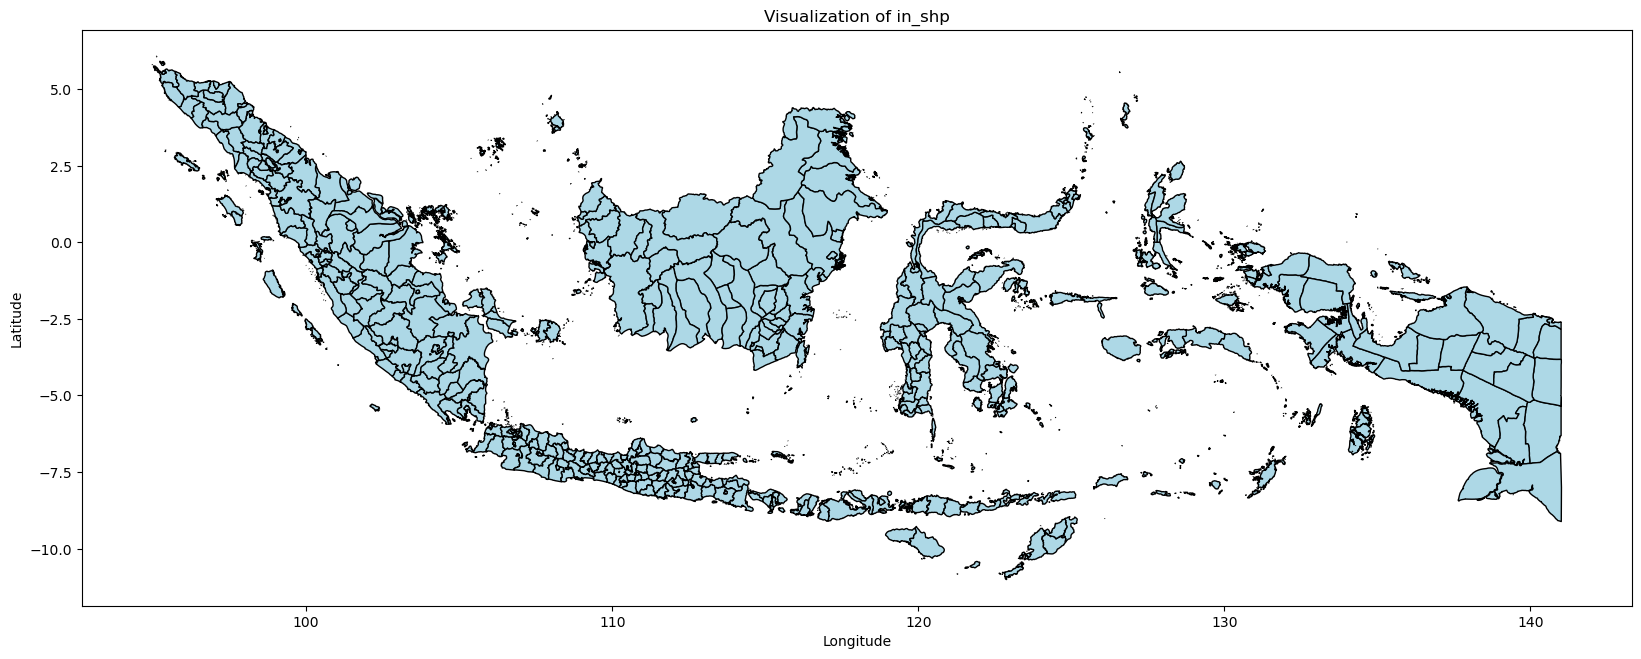

In [8]:
# Read in Indonesia shapefile
in_shp = gpd.read_file(r"D:\Projects\TMU\Indonesia_Dengue\in_shp\Simplify_IDN\IDN_adm2_S.shp")
fig, ax = plt.subplots(figsize=(20, 10))
in_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of in_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [100]:
'''In this cell we create GeoDataframe that contains both polygon information and also incidence data.'''

# Initialize an empty dictionary to store merged DataFrames
merged_all = {}

# List of DataFrame names (in_2010 to in_2023)
years = range(2010, 2024)

# Loop through each year, process the DataFrame, and store the result
for year in years:
    # Dynamically generate the DataFrame name (e.g., in_2010, in_2011, ..., in_2023)
    df_name = f'in_{year}'
    
    # Get the corresponding DataFrame (e.g., in_2010, in_2011)
    df = globals()[df_name]
    
    # Perform the merge with in_shp (shp remains the base)
    merged = pd.merge(in_shp, df, 
                      left_on=['NAME_1', 'NAME_2', 'ENGTYPE_2'], 
                      right_on=['Province', 'City', 'City/Regency'], 
                      how='left')

    # Store the merged DataFrame in the dictionary
    merged_all[year] = merged
    
    # Also store it as a global variable (merged_2010, merged_2011, etc.)
    globals()[f'merged_{year}'] = merged
    
    # Optional: Print the result to check the first few rows
    print(f'Merged data for {year}:')
    print(merged.head())

# Now, merged DataFrames exist globally AND in merged_all dictionary


Merged data for 2010:
      NAME_0 NAME_1  ID_2           NAME_2 ENGTYPE_2        VARNAME_2  \
0  Indonesia   Aceh     1  Aceh Barat Daya   Regency  South West Aceh   
1  Indonesia   Aceh     2       Aceh Barat   Regency        West Aceh   
2  Indonesia   Aceh     3       Aceh Besar   Regency             None   
3  Indonesia   Aceh     4        Aceh Jaya   Regency             None   
4  Indonesia   Aceh     5     Aceh Selatan   Regency       South Aceh   

   InPoly_FID  MaxSimpTol  MinSimpTol  NEW_ID  ... Death_10 Infection_11  \
0           0    0.008993    0.008993       1  ...        0            0   
1           1    0.008993    0.008993       2  ...        0            1   
2           2    0.008993    0.008993       3  ...        1           58   
3           3    0.008993    0.008993       4  ...        0            0   
4           4    0.008993    0.008993       5  ...        0            6   

  Death_11 Infection_12 Death_12 Total_Infections_2010 Total_Death_2010  \
0      

In [ ]:
'''In this cell we plot the heatmap for every year based on the GeoDataframe'''

def plot_dengue_incidence(year, save_dir):
    global_vars = globals()  # Access global variables dynamically
    variable_name = f"merged_{year}"  # Ensure correct GeoDataFrame reference

    if variable_name not in global_vars:
        print(f"Warning: No data available for {year}")
        return

    gdf = global_vars[variable_name]  # Get the corresponding GeoDataFrame

    column_name = f"Incidence_Rate_{year}"
    if column_name not in gdf.columns:
        print(f"Warning: Column {column_name} not found in GeoDataFrame for {year}")
        print(f"Available columns: {gdf.columns}")  # Debugging help
        return

    # Convert the column to numeric, forcing errors to NaN
    gdf[column_name] = pd.to_numeric(gdf[column_name], errors='coerce')

    # Drop rows where the incidence rate is NaN (if desired)
    gdf = gdf.dropna(subset=[column_name])

    # Ensure save directory exists
    os.makedirs(save_dir, exist_ok=True)

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    # Dynamically determine vmin and vmax based on the data
    min_value = gdf[column_name].min()  # Find the minimum value in the column
    max_value = gdf[column_name].max()  # Find the maximum value in the column

    # Plot the heatmap
    gdf.plot(column=column_name, cmap='Blues', linewidth=0.5, edgecolor='black', ax=ax, legend=True,
             missing_kwds={'color': 'lightgray', 'label': "No Data"},
             vmin=min_value, vmax=max_value)

    ax.set_title(f"Dengue Incidence Rate in {year}")

    # Save the figure with consistent dpi
    save_path = os.path.join(save_dir, f"dengue_incidence_{year}.png")
    plt.savefig(save_path, dpi=300)  # Ensure consistent dpi here
    plt.close()
    print(f'Dengue Incidence Heat Map of {year} saved to {save_dir}')

# Example: Mapping function to all years
years_to_plot = list(range(2010, 2024))

for year in years_to_plot:
    plot_dengue_incidence(year, save_dir)





Dengue Incidence Heat Map of 2010 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2011 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2012 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2013 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2014 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2015 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2016 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2017 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2018 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2019 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2020 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Dengue Incidence Heat Map of 2021 saved to D:\Projects\TMU\Indonesia_Dengue\Graphs
Deng

In [101]:
merged_2010

,NAME_0,NAME_1,ID_2,NAME_2,ENGTYPE_2,VARNAME_2,InPoly_FID,MaxSimpTol,MinSimpTol,NEW_ID,...,Death_10,Infection_11,Death_11,Infection_12,Death_12,Total_Infections_2010,Total_Death_2010,Incidence_Rate_2010,CFR,Population_2010
0,Indonesia,Aceh,1,Aceh Barat Daya,Regency,South West Aceh,0,0.008993,0.008993,1,...,0,0,0,1,0,1.0,0.0,0.870686,0.000000,114852.0
1,Indonesia,Aceh,2,Aceh Barat,Regency,West Aceh,1,0.008993,0.008993,2,...,0,1,0,0,0,27.0,1.0,17.810731,3.703704,151594.0
2,Indonesia,Aceh,3,Aceh Besar,Regency,None,2,0.008993,0.008993,3,...,1,58,0,81,2,539.0,3.0,180.108533,0.556586,299264.0
3,Indonesia,Aceh,4,Aceh Jaya,Regency,None,3,0.008993,0.008993,4,...,0,0,0,0,0,6.0,0.0,9.004682,0.000000,66632.0
4,Indonesia,Aceh,5,Aceh Selatan,Regency,South Aceh,4,0.008993,0.008993,5,...,0,6,0,9,0,108.0,0.0,57.170384,0.000000,188909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Indonesia,Yogyakarta,440,Bantul,Regency,None,439,0.008993,0.008993,440,...,0,97,0,76,0,1516.0,8.0,182.221394,0.527704,831955.0
440,Indonesia,Yogyakarta,441,Gunung Kidul,Regency,None,440,0.008993,0.008993,441,...,0,5,1,2,1,944.0,14.0,131.559876,1.483051,717544.0
441,Indonesia,Yogyakarta,442,Kulon Progo,Regency,None,441,0.008993,0.008993,442,...,0,31,0,30,0,467.0,4.0,101.691741,0.856531,459231.0
442,Indonesia,Yogyakarta,443,Sleman,Regency,None,442,0.008993,0.008993,443,...,0,21,0,30,0,600.0,2.0,65.09336,0.333333,921753.0


Death value counts:
 0     14
1      1
4      1
83     1
10     1
20     1
30     1
Name: Total_Death_2010, dtype: int64
Death value description:
 count    20.000000
mean      7.400000
std      19.481165
min       0.000000
25%       0.000000
50%       0.000000
75%       1.750000
max      83.000000
Name: Total_Death_2010, dtype: float64


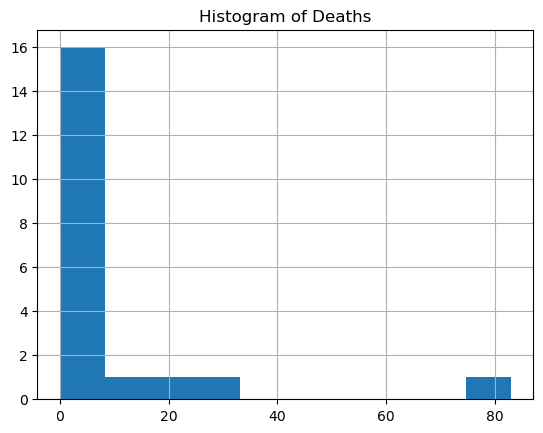

Error during death binning: Bin edges must be unique: array([ 0.,  0., 83.]).
You can drop duplicate edges by setting the 'duplicates' kwarg


ValueError: could not convert string to float: '#e8e8e8'

ValueError: could not convert string to float: '#e8e8e8'

<Figure size 300x300 with 1 Axes>

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_2010 is your DataFrame
# Example DataFrame (replace with your actual data)

merged_2010 = pd.DataFrame(data)

def create_bivariate_classification(df, death_col, infection_col):
    """
    Creates bivariate classification based on quantiles, handling edge cases.
    """

    death_values = df[death_col]
    infection_values = df[infection_col]

    # Debugging: Inspect death values
    print("Death value counts:\n", death_values.value_counts())
    print("Death value description:\n", death_values.describe())
    death_values.hist()
    plt.title("Histogram of Deaths")
    plt.show()

    # Handle edge case: all values are the same
    if death_values.nunique() == 1:
        df['death_quantile'] = 0
        death_bins = [death_values.min(), death_values.max()]
    else:
        q_death = min(4, death_values.nunique())  # Adjust q based on unique values
        try:
            death_bins = pd.qcut(death_values, q=q_death, duplicates='drop', retbins=True)[1]
            df['death_quantile'] = pd.qcut(death_values, q=len(death_bins) - 1, labels=range(len(death_bins) - 1))
        except ValueError as e:
            print(f"Error during death binning: {e}")
            # Manual binning as a fallback
            df['death_quantile'] = death_values.apply(lambda x: 0 if x == 0 else (1 if 1 <= x <= 10 else 2))
            death_bins = [0,1,10, max(death_values)]

    if infection_values.nunique() == 1:
        df['infection_quantile'] = 0
        infection_bins = [infection_values.min(), infection_values.max()]
    else:
        q_infection = min(4, infection_values.nunique())  # Adjust q based on unique values
        infection_bins = pd.qcut(infection_values, q=q_infection, duplicates='drop', retbins=True)[1]
        df['infection_quantile'] = pd.qcut(infection_values, q=len(infection_bins) - 1, labels=range(len(infection_bins) - 1))

    df['bivariate_class'] = df['death_quantile'].astype(str) + df['infection_quantile'].astype(str)
    return df, death_bins, infection_bins

merged_2010, death_bins, infection_bins = create_bivariate_classification(merged_2010, 'Total_Death_2010', 'Total_Infections_2010')

# Define a bivariate colormap (Example: 4x4 color scheme)
bivariate_colors = {
    '00': '#e8e8e8', '01': '#ace4e4', '02': '#5ac8c8', '03': '#218282',
    '10': '#e4acac', '11': '#a3a3a3', '12': '#5698a3', '13': '#176d81',
    '20': '#c85a5a', '21': '#a86464', '22': '#808080', '23': '#115f74',
    '30': '#930000', '31': '#6c0000', '32': '#4a0000', '33': '#320000',
}

# Apply the colors to the GeoDataFrame
merged_2010['color'] = merged_2010['bivariate_class'].map(bivariate_colors)

# Create a reference bivariate color grid
legend_matrix = np.array([[bivariate_colors[f"{i}{j}"] for j in range(4)] for i in range(4)])

# Plot the legend
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(np.arange(16).reshape(4, 4), annot=False, cmap=[list(row) for row in legend_matrix], cbar=False, linewidths=0.5, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Legend: Deaths (Y) vs. Infections (X)")

plt.show()